In [1]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

D:\Users\chungch\AppData\Local\Continuum\Anaconda3\envs\python3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
Using TensorFlow backend.


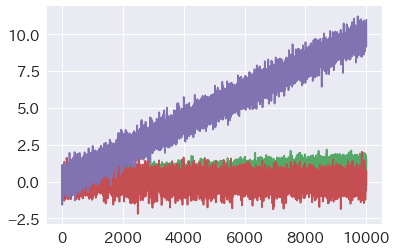

In [2]:
# Make a sample data:
# y is linear with x1, x1 and x2 are colinear, x3 is pure noise

size = 10000
num_features = 3

x1 = np.random.normal(0,0.3,(size,1)) + np.linspace(0,1,size).reshape((size,1))
x2 = np.random.normal(0,0.1,(size,1)) + x1 + 0.2
x3 = np.random.normal(0,0.5,(size,1))

X = np.concatenate((x1,x2,x3), axis=1)
pd.Series(X.T[0]).plot()
pd.Series(X.T[1]).plot()
pd.Series(X.T[2]).plot()

y = np.random.normal(0,0.5,size) + np.linspace(0,10,size)
pd.Series(y).plot()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, shuffle=True)

train_data = pd.DataFrame(
    np.hstack([X_train, y_train.reshape(y_train.size,1)]),
    columns=['x1', 'x2', 'x3', 'y'])

test_data = pd.DataFrame(
    np.hstack([X_test, y_test.reshape(y_test.size,1)]),
    columns=['x1', 'x2', 'x3', 'y'])

### fit against one explaining feature

In [3]:
ols = smf.ols(formula='y ~ x1', data=train_data)
result = ols.fit()
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.477     
Dependent Variable: y                AIC:                30394.0638
Date:               2017-12-27 13:58 BIC:                30407.7711
No. Observations:   7000             Log-Likelihood:     -15195.   
Df Model:           1                F-statistic:        6372.     
Df Residuals:       6998             Prob (F-statistic): 0.00      
R-squared:          0.477            Scale:              4.4990    
---------------------------------------------------------------------
               Coef.    Std.Err.      t      P>|t|    [0.025   0.975]
---------------------------------------------------------------------
Intercept      2.5592     0.0398   64.3803   0.0000   2.4813   2.6371
x1             4.8735     0.0611   79.8233   0.0000   4.7538   4.9932
-------------------------------------------------------------------
Omnibus:              40.694        Durbin-Watson:           1.990 
Prob(Omnibus):        0.000         Jarque-Bera (JB):        28.919
Skew:                 -0.002        Prob(JB):                0.000 
Kurtosis:             2.685         Condition No.:           3     
===================================================================

"""

In [36]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     6372.
Date:                Wed, 27 Dec 2017   Prob (F-statistic):               0.00
Time:                        14:14:55   Log-Likelihood:                -15195.
No. Observations:                7000   AIC:                         3.039e+04
Df Residuals:                    6998   BIC:                         3.041e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5592      0.040     64.380      0.000       2.481       2.637
x1             4.8735      0.061     79.823      0.000       4.754       4.993
==============================================================================
Omnibus:                       40.694   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.919
Skew:                          -0.002   Prob(JB):                     5.25e-07
Kurtosis:                       2.685   Cond. No.                         3.11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

mse 4.497675103836702
qqplot of resid againt normal


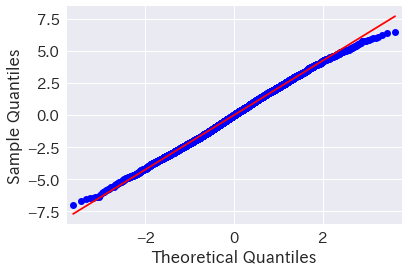

In [4]:
# mean square error
resid = result.resid
print('mse', np.mean(np.square(resid)))

print('qqplot of resid againt normal')
fig = sm.qqplot(resid, line='s')

In [109]:
from io import StringIO

temp = StringIO(result.summary().as_csv())
temp = pd.read_csv(temp, names=list(range(7)))

temp.loc[4,1] = temp.loc[4,2]
temp.loc[4,2] = temp.loc[4,3]
temp.loc[4,3] = temp.loc[4,4]
temp.loc[4,4] = None

summary = pd.DataFrame(
    np.concatenate((temp.loc[1:9,1].values,
                    temp.loc[1:7,3].values,
                    temp.loc[13:16,1].values,
                   )))
summary.index = np.concatenate((temp.loc[1:9,0].values,
                                temp.loc[1:7,2].values,
                                temp.loc[13:16,0].values,
                               ))
summary = summary.T
summary['model_id'] = '0001'
summary.set_index(['model_id'], inplace=True)

coff = pd.DataFrame(temp.iloc[11:-4].values, columns=temp.iloc[10].tolist())
coff['model_id'] = '0001'
coff.set_index(['model_id', coff.columns[0]], inplace=True)

coff

coef      std err       t      P>|t|     [0.025   \
model_id                                                                  
0001     Intercept      2.5592      0.040     64.380   0.000      2.481   
         x1             4.8735      0.061     79.823   0.000      4.754   

                      0.975]   
model_id                       
0001     Intercept      2.637  
         x1             4.993

### Fit against colinear features

In [ ]:
result2 = smf.ols(formula='y ~ x1*x2', data=train_data).fit()
result2.summary2()

In [ ]:
# mean square error
resid = result2.resid
print('mse', np.mean(np.square(resid)))

print('qqplot of resid againt normal')
fig = sm.qqplot(resid, line='s')

### Fig against pure noise

return high p value

In [ ]:
result3 = smf.ols(formula='y ~ x3', data=train_data).fit()
result3.summary2()

In [ ]:
# mean square error
resid = result3.resid
print('mse', np.mean(np.square(resid)))

print('qqplot of resid againt normal')
fig = sm.qqplot(resid, line='s')

In [ ]:
model = Sequential()
model.add(Dense(1, input_dim=1, activation='linear'))

model.compile(loss='mse',
              optimizer='rmsprop')
# metrics=['accuracy'] # for classification
    
history = model.fit(X_train.T[0], y_train,
          validation_split=0.2, epochs=50,
          callbacks=[plotter])
# epochs=120
# batch_size=128

score = model.evaluate(X_test.T[0], y_test)
# batch_size=128

score

In [ ]:
model.summary()

In [ ]:
# val_loss is better than train loss?! wtf?
# no worry: train loss use average loss in an epoch
# val loss only use the end of an epoch, which can be better than average.
pd.DataFrame(history.history)

# Apply on house price prediction

In [ ]:
df = pd.concat([pd.read_csv('./data/house_train.csv'), pd.read_csv('./data/house_test.csv')])
df.head()